In [96]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.nn import convolution, conv2d_transpose

In [97]:
N = 1000
dt = 0.01
h = 1

In [112]:
A = -np.array([[0, -1, 0, 0], [-1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0]])
B = -np.array([[0, 0, -1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]) * h
C = -np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, -1, 0], [0, 0, 0, 0]]) * h
D = np.array([[0, 0, 0, 0], [0, 0, 1, 0], [0, -1, 0, 1], [0, 0, -1, 0]]) / h**2

In [113]:
B

array([[ 0,  0,  1,  0],
       [ 0,  0,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  0,  0]])

In [114]:
_filt_0 = np.stack([B, C, D]).reshape(3,4,4,1).transpose((1, 2, 3, 0))
_filt_1 = A.reshape(1,4,4,1).transpose((1, 2, 3, 0))

jdx0=np.arange(1, 2 * N + 1, 2)
jdx1=np.arange(2, 2 * N + 1, 2)

In [115]:
_X = np.zeros(shape=(2 * N + 2, 2 * N + 2))
dX = _X * 0

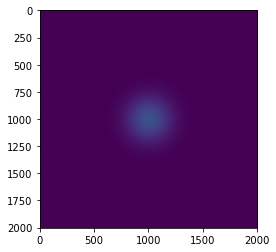

In [116]:
x = np.linspace(0,10,2002)
mesh = np.stack(np.meshgrid(x, x))

_X[jdx1.reshape(-1,1),jdx1.reshape(1,-1)] = np.exp(-np.sum(np.square(mesh-np.array([5,5]).reshape((2,1,1))), axis=0))[jdx1.reshape(-1,1),jdx1.reshape(1,-1)]

plt.imshow((_X))

In [117]:
mesh.shape

(2, 2002, 2002)

In [118]:
temp =np.arange(2 * N + 2)
hu = np.vectorize(lambda x: x % 2>0)(temp.reshape(-1,1) + temp.reshape(1,-1))
vu = np.vectorize(lambda x: x % 2==0)(temp.reshape(-1,1) + temp.reshape(1,-1))

In [119]:
_R = _X.copy()*0 + 1
_R[hu]=10000

In [120]:
mu=1
eps=1

In [121]:
filt_0= tf.constant(_filt_0, name='maxwell', dtype=tf.float64)
filt_1= tf.constant(_filt_1, name='continuity', dtype=tf.float64)
R= tf.constant(_R.reshape((1, 2 * N + 2, 2 * N + 2, 1)), name='resistance', dtype=tf.float64)
X = tf.Variable(_X.reshape((1, 2 * N + 2, 2 * N + 2, 1)), name='X', dtype=tf.float64)

In [122]:
_x.shape

(2002, 2002)

In [169]:
for jter in range(10000):
    y_0 = tf.squeeze(convolution(X, filters=filt_0, strides=2, padding='VALID'))
    y_1 = tf.squeeze(convolution(X / R, filters=filt_1, strides=2, padding='VALID'))
    
    _x = np.squeeze((X / R / eps).numpy())
    dX[jdx0.reshape(-1,1), jdx0.reshape(1,-1)] = y_1.numpy()
    dX[jdx0.reshape(-1,1), jdx1.reshape(1,-1)] = y_0.numpy()[:, :, 0] - _x[jdx0.reshape(-1,1), jdx1.reshape(1,-1)]  
    dX[jdx1.reshape(-1,1), jdx0.reshape(1,-1)] = y_0.numpy()[:, :, 1] - _x[jdx1.reshape(-1,1), jdx0.reshape(1,-1)] 
    dX[jdx1.reshape(-1,1), jdx1.reshape(1,-1)] = y_0.numpy()[:, :, 2]

    X.assign_add(dt * dX.reshape((1, 2 * N + 2, 2 * N + 2, 1)) / mu / eps)
    print(np.max(np.squeeze(X)[jdx1.reshape(-1,1),jdx1.reshape(1,-1)]))

0.22901845379734562
0.22901217942178667
0.22900590691130923
0.2289996351610832
0.22899336260048758
0.2289870922367817
0.2289808219052942
0.22897454974785117
0.22896828392321256
0.22896201065901542
0.22895574581236502
0.2289494793316928
0.22894320541197752
0.22893694537232653
0.2289306805109802
0.22892440821122262
0.22891814853972692
0.22891188757106137
0.2289056191647326
0.2288993534924128
0.22889309868749178
0.2288868364457718
0.22888056676705565
0.228874310106468
0.22886805629795653
0.2288617950534293
0.22885553299464906
0.2288493069694498
0.22884307351020047
0.22883683261670218
0.2288305842887566
0.22882432933795335
0.2288180741642492
0.228811819259641
0.22880556394481436
0.22879931201205297
0.22879305852782475
0.22878680593044134
0.22878055458844704
0.22877430304160026
0.22876805166350317
0.22876180343808553
0.22875554791596153
0.2287493052812479
0.22874305521456095
0.22873680480471953
0.22873056259687669
0.22872431295763176
0.22871806423544525
0.22871182472122492
0.228705577776289

0.22645244205513962
0.22644639659993152
0.22644035743886032
0.2264343180984328
0.22642827140559915
0.22642223748080917
0.226416199089607
0.22641015334659834
0.22640412080817643
0.2263980855517413
0.2263920429442133
0.22638600612569462
0.22637997618751035
0.22637393889906085
0.22636789426014603
0.22636186788372362
0.22635583809562485
0.22634980095800214
0.22634375647065547
0.22633775677961332
0.22633175230520117
0.22632574048331405
0.22631972131375042
0.22631369479630917
0.22630766502136018
0.22630163555253532
0.22629560726695955
0.226289579436202
0.22628354951178128
0.22627752482498853
0.22627149639347824
0.22626547231293836
0.2262594435580875
0.22625342226681258
0.22624739362956578
0.22624137323640217
0.2262353495706034
0.22622932195752493
0.2262233054431241
0.22621728158391757
0.22621125617127877
0.22620524164228803
0.22619921976914525
0.22619319185084688
0.22618718148471414
0.22618116377519698
0.22617513872209505
0.2261691228122665
0.22616311144176449
0.2261570927285586
0.2261510666

0.22397833272753073
0.22397250413225878
0.223966675736897
0.2239608400761242
0.22395500840847324
0.22394918455987806
0.22394335344665817
0.22393751506861012
0.2239316947754287
0.22392587030967243
0.22392003857998552
0.2239142021498925
0.22390839015539268
0.22390259560567552
0.22389679379433627
0.22389098472116978
0.22388516838597133
0.22387934542359658
0.22387352178536016
0.22386769850570923
0.22386187458765097
0.22385605350962848
0.22385023205043808
0.22384440907333286
0.22383859029978118
0.22383276752595993
0.22382694995172198
0.22382112948248625
0.2238153099106476
0.22380949384598317
0.22380367052145791
0.2237978578105871
0.22379204098976702
0.2237862169095907
0.22378040864457013
0.22377459316564832
0.2237687704279861
0.22376296248843358
0.2237571504477459
0.22375133114904489
0.22374551771343296
0.22373971120535227
0.22373389744009653
0.22372807641746195
0.22372227210721676
0.22371646596768185
0.22371065257171738
0.22370487204271103
0.22369908822429174
0.22369329715116631
0.22368749

0.22158813647574946
0.22158248789651286
0.22157685909059405
0.22157122355502154
0.22156558083960057
0.22155993851668865
0.22155431086577354
0.2215486968045997
0.2215430882783737
0.22153747257463788
0.22153184969318387
0.22152621963380378
0.22152058564513658
0.22151495179055625
0.22150931889258402
0.2215036865615039
0.22149805279092644
0.22149242224467752
0.22148679042470726
0.22148115971307286
0.22147552865851244
0.2214698998063171
0.22146426671872663
0.22145864174960567
0.2214530096047681
0.2214473831561028
0.22144175691722798
0.2214361235031039
0.2214305017181019
0.2214248762313999
0.2214192435700246
0.22141362286457575
0.22140800015042128
0.22140237026227805
0.2213967454473161
0.22139112752430512
0.22138550242809837
0.2213798701584887
0.22137425559843282
0.22136863731086226
0.22136301185079005
0.2213574059123586
0.22135181465961373
0.22134621623635087
0.2213406106423612
0.22133499787743643
0.22132937945255463
0.22132376031226134
0.2213181420631624
0.2213125251329758
0.22130690834002

0.219275463644944
0.2192700094405517
0.219264566086976
0.2192591358521217
0.21925369852215298
0.2192482540968579
0.21924280257602496
0.21923734576394785
0.2192318890077917
0.2192264327460761
0.21922097673496121
0.21921551920438978
0.2192100661792292
0.21920461042445816
0.21919915689509437
0.219193702003832
0.21918824992339228
0.21918279345980177
0.21917734478033168
0.2191718890073646
0.21916643945993017
0.21916098903932585
0.2191555315256541
0.21915008731784794
0.21914463710663454
0.21913917980288916
0.21913373783869006
0.21912828978599222
0.2191228346414036
0.21911739030856284
0.21911194636188835
0.2191064953240701
0.21910104249795115
0.21909560460298239
0.21909015961772263
0.21908470754196102
0.21907927365620847
0.21907386008443488
0.2190684394243854
0.2190630116758476
0.2190575768386096
0.21905213525919517
0.2190466926017489
0.21904125021624668
0.21903580863032313
0.21903036685187205
0.21902492458072687
0.21901948568204813
0.219014042000377
0.21900860575440168
0.21900316242100826
0.

0.21703517228217975
0.21702989261852482
0.21702460593956824
0.21701931491901472
0.217014023879588
0.2170087336373463
0.21700344408005903
0.21699815365256428
0.21699286453012806
0.21698757643314637
0.2169822864937441
0.2169770000614727
0.21697171119083997
0.21696642431719534
0.21696113840008602
0.21695584754071867
0.21695056646070274
0.21694527836786492
0.21693999227516597
0.21693471090232128
0.2169294225171499
0.21692413853993459
0.216918858756281
0.21691357196089903
0.216908286014154
0.21690300970024337
0.21689772637530574
0.216892436039127
0.216887161978307
0.21688188400280037
0.2168765990168568
0.21687131240443513
0.21686605392097927
0.21686080442032654
0.21685554791147435
0.21685028439420695
0.2168450138683091
0.21683973710004661
0.21683445929163686
0.21682918192713646
0.2168239056230738
0.2168186295593202
0.21681335148011138
0.21680807801452093
0.2168028013358267
0.216797527968384
0.2167922513271636
0.21678697993765972
0.2167817015411349
0.21677643300549979
0.21677115846618278
0.2

0.21486271257495249
0.21485757869851774
0.2148524449497195
0.21484731003524288
0.21484217906197
0.21483704595651812
0.21483191394192805
0.21482678226874843
0.2148216509693471
0.21481651892272272
0.2148113901597724
0.21480625457262947
0.2148011301663113
0.21479599882515835
0.2147908682819239
0.21478574311699036
0.21478061101767784
0.21477548327087304
0.21477035916611265
0.21476522812752957
0.21476009957217507
0.2147549783450398
0.21474985018473852
0.21474471586119442
0.2147395993276127
0.21473447586162211
0.2147293454630051
0.2147242194334709
0.21471910247611142
0.21471401045611962
0.21470891240030837
0.214703807414098
0.21469869549726983
0.2146935766496056
0.21468845488441438
0.21468333350142993
0.21467821247543295
0.21467309114245012
0.21466797038538146
0.2146628516138492
0.21465772894954277
0.21465261286181303
0.21464749009262643
0.2146423755997445
0.21463725417770618
0.21463213918383
0.21462702117273777
0.21462190161519612
0.21461678882956103
0.21461166911569188
0.21460655379520735


0.21275429665670242
0.2127493119748988
0.21274432869609367
0.21273934263794325
0.21273436149806796
0.21272937582573495
0.21272439529170623
0.21271941176653908
0.21271442901529594
0.21270944939765238
0.21270446292086212
0.21269948636702732
0.21269450555759026
0.21268951903610536
0.21268454565197206
0.2126795654098461
0.2126745783095069
0.2126696072202931
0.21266462930336066
0.21265964452882843
0.21265467013569805
0.21264969630045036
0.212644715608314
0.21263973217792842
0.21263476417928676
0.21262979482296362
0.21262485007558693
0.21261989847374277
0.21261494001720893
0.21260997470576365
0.21260500265157828
0.2126000285786297
0.21259505469692475
0.21259008146501016
0.21258510836028213
0.21258013358428077
0.21257516337423932
0.2125701901420825
0.2125652194242677
0.21256024687943492
0.21255527739916052
0.21255030338833278
0.21254533690158173
0.21254036356172681
0.21253539624967493
0.2125304276588445
0.2125254524794747
0.2125204903914347
0.212515521451341
0.2125105475143875
0.2125055868302

0.2107065520905597
0.21070171092651652
0.2106968663686822
0.21069202598802989
0.21068718321284052
0.21068234110710085
0.21067750181827116
0.2106726557439158
0.21066782015719887
0.21066297927245314
0.21065813498083405
0.2106533009872003
0.21064846020912217
0.2106436164197578
0.21063878423369037
0.2106339452637504
0.21062909950971445
0.2106242693122254
0.21061943385061763
0.21061459160558085
0.2106097544199566
0.21060492416543516
0.210600087128247
0.21059528289847282
0.2105904731788208
0.21058565667811724
0.21058083339613737
0.21057600333265683
0.2105711693807396
0.21056633591899118
0.21056150267505122
0.2105566692547769
0.210551835929088
0.21054700499964174
0.21054217114326843
0.2105373413031294
0.2105325081478953
0.21052767921097504
0.21052284488310072
0.21051801854895574
0.21051318543517475
0.21050835792397196
0.2105035291120925
0.21049869472642843
0.2104938719139719
0.21048904232285956
0.21048421001553339
0.21047938812079972
0.21047455944793117
0.2104697258761491
0.21046490659533434


0.2087164245923273
0.20871171840731556
0.20870700639264458
0.2087023032983943
0.2086975934902193
0.2086928876208026
0.20868818255298624
0.20868347077159136
0.20867876980362018
0.208674064411228
0.20866935230569644
0.20866465383536115
0.20865994976636368
0.20865523898475885
0.20865053945074263
0.20864583835194223
0.20864113054115918
0.20863642522678244
0.2086317287436567
0.208627025549266
0.20862233545617911
0.20861766337950638
0.20861298459339747
0.20860829909762454
0.20860360689196025
0.20859890814852877
0.2085942078386144
0.2085895075441218
0.20858480808434832
0.20858010918137057
0.20857540939737032
0.20857071061558954
0.20856601300627234
0.2085613131678262
0.20855661727200955
0.208551918023795
0.20854722222204175
0.20854252521020405
0.2085378267264442
0.2085331335962235
0.20852843375811567
0.2085237408953391
0.20851904658364637
0.20851434556445622
0.20850965652504486
0.20850496267604174
0.20850026212002365
0.20849557395264395
0.20849088220940712
0.20848618375973033
0.208481492361189

0.2067811245698337
0.20677654715834262
0.20677196310234283
0.20676738808590256
0.20676280834776928
0.2067582265888148
0.20675365276579438
0.20674907229921016
0.20674449268978293
0.20673991973508415
0.20673534013731545
0.20673075950672964
0.20672618901645154
0.20672161188368793
0.20671702810821005
0.2067124595317638
0.20670788645897986
0.20670330674415643
0.20669874881573283
0.2066942037767104
0.20668965209767864
0.20668509377840716
0.20668052881866605
0.20667595738854935
0.20667138438990895
0.20666681135134332
0.20666223916279156
0.20665766765198362
0.2066530955438803
0.20664852324602478
0.20664395350415085
0.20663937990663908
0.20663481224536923
0.2066302389443283
0.20662567197693546
0.2066211005678029
0.2066165318078637
0.20661196388524528
0.20660738974835388
0.20660282690587567
0.20659825742533416
0.20659368654186525
0.2065891237346458
0.20658455428980868
0.20657998406800232
0.2065754228885822
0.20657085507208037
0.2065662818251027
0.20656172386488747
0.20655715926821686
0.206552588

0.20489808114517566
0.2048936273950777
0.20488916950270922
0.20488470982437096
0.20488025740054924
0.2048757984006274
0.20487134152461356
0.20486688954184443
0.20486243098343268
0.20485797409659273
0.2048535241028647
0.2048490675340399
0.20484460677752267
0.20484016031970464
0.20483570728742392
0.20483124768044925
0.2048268033386431
0.20482238173986428
0.2048179535686131
0.2048135188246567
0.20480907750776267
0.20480462961769905
0.20480017821795143
0.20479572706037596
0.20479127625568705
0.20478682572754284
0.20478237435029759
0.20477792498214198
0.20477347562691614
0.2047690247313167
0.2047645772720636
0.20476012639689486
0.20475567965982372
0.20475123035232862
0.20474678211701727
0.20474233592367125
0.20473788315903566
0.20473344139114463
0.2047289932867828
0.20472454399070272
0.2047201020912352
0.20471565362144234
0.20471120576515214
0.2047067650444291
0.20470231775387934
0.20469786803166481
0.20469343003322615
0.2046889854655475
0.20468453432839753
0.204680095797852
0.2046756554954

0.20306491773987848
0.20306057188847715
0.2030562367635504
0.20305189595939907
0.20304755217400322
0.20304321791930025
0.20303887715457405
0.2030345337816892
0.2030302010681953
0.20302586184518714
0.2030215161124314
0.20301718573276853
0.20301284955273202
0.20300850686354296
0.20300417043916125
0.20299985401874535
0.20299554595431898
0.2029912313829086
0.2029869103042793
0.20298258271819666
0.20297824891251057
0.20297391356218705
0.20296957842721705
0.20296524360482737
0.20296091001847727
0.20295657637507078
0.20295224068727627
0.20294790914812685
0.20294357469864896
0.20293924292027363
0.20293490873002687
0.20293057821381297
0.20292624230716597
0.20292191455379135
0.20291758029467968
0.20291325046863953
0.20290892047273507
0.2029045839713846
0.20290025925859798
0.2028959285200292
0.20289159319199404
0.20288726971416549
0.20288293973196453
0.20287860324515763
0.2028742818776235
0.20286995414985978
0.202865619918039
0.20286129479774362
0.20285697082139836
0.2028526403416308
0.2028483412

0.20127940066595462
0.20127517495443514
0.20127094279615448
0.20126671607076455
0.2012624900199687
0.20125825752280146
0.20125403258225377
0.20124980765085254
0.20124557627355366
0.20124134998385523
0.20123712762956958
0.20123289882994416
0.20122866710928422
0.20122444878875947
0.2012202426574096
0.2012160450329103
0.20121184096517408
0.20120763045396414
0.20120341349904408
0.20119919062465288
0.20119496640698376
0.20119074288959063
0.20118651903017903
0.20118229613084035
0.2011780741095776
0.20117385052738088
0.20116962872912106
0.2011654067793941
0.2011611844976826
0.20115696337944292
0.2011527420720749
0.20114852003379285
0.2011443011579112
0.20114007583987994
0.2011358605108968
0.2011316390812172
0.20112741793809807
0.20112320185232832
0.2011189793252507
0.20111476101237585
0.20111054528441283
0.20110632311557092
0.20110210500001063
0.20109789108452153
0.20109367072866643
0.20108944923199074
0.20108523858263347
0.20108102149350696
0.2010768009162691
0.201072616834259
0.201068426314

0.199539464919389
0.19953533858022962
0.1995312202878504
0.19952709963752732
0.19952297260282276
0.19951885694300547
0.19951473701394185
0.19951061070093792
0.19950649486021574
0.1995023770686983
0.19949825289376183
0.19949413315355471
0.19949001891487772
0.19948591265148477
0.19948182252808908
0.19947772602353708
0.19947362313759004
0.1994695138700096
0.19946539832596022
0.19946128079039008
0.1994571631239066
0.1994530460546543
0.19944892994784136
0.19944481398791203
0.19944069651905644
0.19943658157010047
0.19943246569635809
0.19942835003378742
0.1994242351171756
0.1994201201572269
0.19941600465299822
0.1994118918113093
0.1994077732685375
0.19940366396002676
0.19939954827176445
0.1993954346623714
0.19939132392192607
0.19938720680204378
0.1993830966939266
0.1993789859357199
0.1993748687984728
0.19937075985540298
0.19936665049279007
0.1993625347516152
0.19935842373486184
0.19935431718027197
0.1993502042476804
0.19934608701765738
0.19934200722051493
0.1993379239789291
0.199333834361218


0.1978431504691949
0.1978391328576432
0.19783511493762287
0.1978310906936203
0.19782707610253056
0.19782305852767365
0.1978190346292427
0.1978150205410576
0.197811004688109
0.19780698251207463
0.19780296554432292
0.19779895278910178
0.1977949337821857
0.1977909483637639
0.1977869566246716
0.19778295856466815
0.19777895418351335
0.19777494348096739
0.1977709281495602
0.1977669130939988
0.19776289812862674
0.19775888348018889
0.1977548685074254
0.19775085364230602
0.19774684084990854
0.19774282522615094
0.19773881344346406
0.19773479851339534
0.1977307871765957
0.1977267715855537
0.19772276207067085
0.19771874623590627
0.19771473728154862
0.19771072464450898
0.1977067111001031
0.19770270303545984
0.197698688651665
0.19769467883563666
0.19769067039863136
0.1976866556428401
0.19768264749260817
0.19767864005717153
0.19767462630339447
0.19767061689414772
0.19766661183334927
0.19766260045473594
0.19765858600114689
0.19765459226110582
0.19765061351273686
0.19764662844859782
0.197642637068448
0

0.19617687437078038
0.19617295662379441
0.19616903261208046
0.19616511246857063
0.19616119605017035
0.19615727336749797
0.19615335091401379
0.19614943716231614
0.19614551714688075
0.19614160767221364
0.1961377180328584
0.1961338221315496
0.19612991996804513
0.19612601154210338
0.1961220968534831
0.1961181793756906
0.19611426171263321
0.1961103445349918
0.19610642812857063
0.19610251194989525
0.19609859462628432
0.19609467898586963
0.19609076344296503
0.1960868466671453
0.19608293255345294
0.19607901598102107
0.19607510211717483
0.19607118708641097
0.19606727146585023
0.1960633593144154
0.19605944090209812
0.19605553116953744
0.19605161697399281
0.1960477003308346
0.19604379168826078
0.196039876785639
0.19603596189916725
0.19603205388544612
0.19602813961209117
0.1960242238479376
0.19602031779854154
0.19601640549000401
0.19601248692208437
0.19600858264061785
0.1960046892517553
0.1960008060857471
0.1959969166625607
0.19599302098195398
0.19598911904368527
0.19598521108185896
0.195981301688

0.19456272135947147
0.19455889482003344
0.1945550620730148
0.19455124222558126
0.19454741664268024
0.1945435848526234
0.1945397641693577
0.19453594084513212
0.19453211131425205
0.19452830125071513
0.19452450496364881
0.19452070247188116
0.1945168937751687
0.19451307887326838
0.19450925779697795
0.19450543421911046
0.19450161046587258
0.19449778707103904
0.19449396461502294
0.19449014261927985
0.19448631980967523
0.19448249699171125
0.19447867620514706
0.19447485205840728
0.1944710330692368
0.19446720889639102
0.19446339068670446
0.1944595677899467
0.19445574855072856
0.19445192823168453
0.19444810536358134
0.1944442889232034
0.1944404662795134
0.19443664777649702
0.1944328303122106
0.19442900664491986
0.19442519092958438
0.1944213737417208
0.19441755035123706
0.19441373505738158
0.19440991944554006
0.19440609763153885
0.19440227960548948
0.19439846686843965
0.194394666746861
0.19439087674576286
0.19438708054461887
0.19438327814318554
0.1943794695412198
0.19437565501972376
0.19437183927

0.1929870088419386
0.1929832713147484
0.19297953160862139
0.1929758008365423
0.19297206391326976
0.19296832316118465
0.19296459426027351
0.1929608592086389
0.19295711800603746
0.19295339569400208
0.19294969044272853
0.19294597904260252
0.1929422614933792
0.19293853779481412
0.1929348079466633
0.19293107469891643
0.1929273412998722
0.19292360821478688
0.19291987583246892
0.19291614378232305
0.1929124109346664
0.19290867865770403
0.19290494776175807
0.19290121397323665
0.19289748491870964
0.19289375088674396
0.1928900228050818
0.19288628979734784
0.19288256106252408
0.19287883034616843
0.1928750985754854
0.19287137141702965
0.19286763811093813
0.1928639111377546
0.19286018265589286
0.19285644802667606
0.19285272448853072
0.19284899594921456
0.1928452612628988
0.19284153904210027
0.19283781171060185
0.19283407823253387
0.19283035445717586
0.19282662959799957
0.19282291377879013
0.19281921463481053
0.19281550934651914
0.19281179791367112
0.192808080336022
0.19280435665380508
0.192800630802

KeyboardInterrupt: 

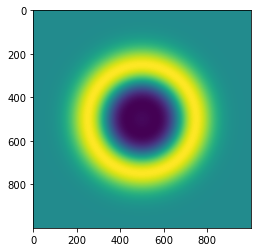

In [170]:
plt.imshow(np.squeeze(X)[jdx1.reshape(-1,1),jdx1.reshape(1,-1)])

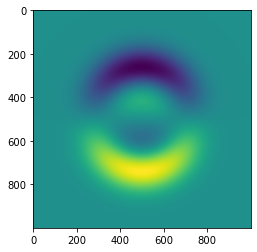

In [171]:
plt.imshow(np.squeeze(X)[jdx0.reshape(-1,1), jdx1.reshape(1,-1)])

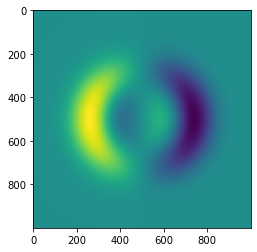

In [172]:
plt.imshow(np.squeeze(X)[jdx1.reshape(-1,1), jdx0.reshape(1,-1)])

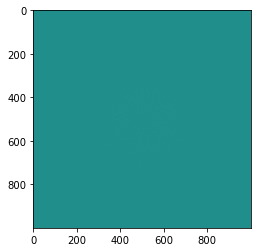

In [173]:
plt.imshow(np.squeeze(X)[jdx0.reshape(-1,1),jdx0.reshape(1,-1)])

In [174]:
x = np.linspace(0,10,1000)
x_pos, y_pos = np.meshgrid(x, x)

In [175]:
np.squeeze(X)[jdx1.reshape(-1,1), jdx0.reshape(1,-1)].shape

(1000, 1000)

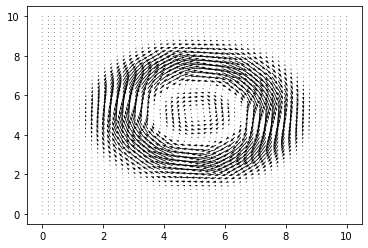

In [180]:
fig, ax = plt.subplots()

x_pos = 0
y_pos = 0
x_direct = 1
y_direct = 1

ax.quiver(np.linspace(0,10,50),np.linspace(0,10,50),np.squeeze(X)[jdx0[::20].reshape(-1,1), jdx1[::20].reshape(1,-1)],np.squeeze(X)[jdx1[::20].reshape(-1,1), jdx0[::20].reshape(1,-1)])

plt.show()

In [ ]:
dX

In [ ]:
tf.Session().run?

In [ ]:
tf.Session().run

In [ ]:
Z=tf.squeeze(X)

In [ ]:
tf.Tensor?

In [ ]:
Z[1::2,1::2]=y_0

In [ ]:
tf.tile?

In [ ]:
_R = _R*0

In [ ]:
_R[jdx1.reshape(-1,1), jdx1.reshape(1,-1)]=1

In [ ]:
_R

In [ ]:
y.shape

In [ ]:
x = tf.zeros(shape=(1,12,12,1), dtype=tf.float32)

In [ ]:
ff = tf.reshape(tf.constant([[0,-1],[1,0]], dtype=tf.float32), (2,2,1,1))

In [ ]:
ff

In [ ]:
y=convolution(x, ff, 'SAME')

In [ ]:
print(y)

In [ ]:
with  tf.Session() as sess:
    print(sess.run(y))

In [ ]:
y

In [ ]:
x = x_0
for jter in range(max_iter):
    